In [1]:
##importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("honda_car_selling_price.csv")

# EDA

In [3]:
df

,Year,Kms_driven,Fuel Type,Suspension,Price,Car_model
0,2019,19006,Petrol,Automatic,928999,Honda City V CVT
1,2021,11936,Petrol,Automatic,1395000,Honda City ZX CVT
2,2018,29635,Petrol,Automatic,994999,Honda City i-VTEC CVT ZX
3,2020,16163,Petrol,Automatic,1326000,Honda City ZX CVT
4,2015,105114,Petrol,Manual,568000,Honda City i VTEC V
...,...,...,...,...,...,...
994,2007,120000,Petrol,Manual,85000,Honda City VTEC
995,2005,110000,Petrol,Manual,60000,Honda City 1.5 GXI
996,2008,92000,Petrol,Manual,95000,Honda City GXi
997,2006,186719,Petrol,Manual,90000,Honda City GXi


In [4]:
#basic information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        999 non-null    int64 
 1   Kms_driven  999 non-null    int64 
 2   Fuel Type   999 non-null    object
 3   Suspension  999 non-null    object
 4   Price       999 non-null    int64 
 5   Car_model   999 non-null    object
dtypes: int64(3), object(3)
memory usage: 47.0+ KB


In [5]:
#statistical summary
df.describe()

,Year,Kms_driven,Price
count,999.000000,9.990000e+02,9.990000e+02
mean,2014.717718,6.607667e+04,5.530370e+05
std,3.713756,5.310468e+04,3.030851e+05
min,2000.000000,1.425000e+03,4.500000e+04
25%,2013.000000,3.534100e+04,3.265000e+05
50%,2015.000000,5.990000e+04,5.099990e+05
75%,2017.000000,8.528750e+04,7.000000e+05
max,2023.000000,1.100000e+06,2.650000e+06


In [6]:
#creating a copy of the data to do analysis and cleaning on it
df_copy = df.copy()

In [7]:
#checking for missing values
df_copy.isnull().sum()

Year          0
Kms_driven    0
Fuel Type     0
Suspension    0
Price         0
Car_model     0
dtype: int64

C:\Users\bibek\AppData\Local\Temp\ipykernel_2536\1499795588.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_copy.corr()


<Axes: >

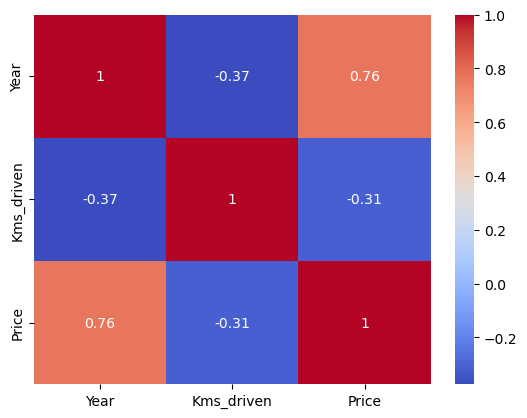

In [8]:
#correlation matix
corr_matrix = df_copy.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [9]:
#droping unnessary columns
df_copy.drop("Car_model", axis = 1, inplace = True)

In [10]:
df_copy.head(2)

,Year,Kms_driven,Fuel Type,Suspension,Price
0,2019,19006,Petrol,Automatic,928999
1,2021,11936,Petrol,Automatic,1395000


In [11]:
#check for duplicate values
df_copy.duplicated().sum()

29

In [12]:
#droping duplicate values
df_copy.drop_duplicates(inplace = True)

In [13]:
df_copy.duplicated().sum()

0

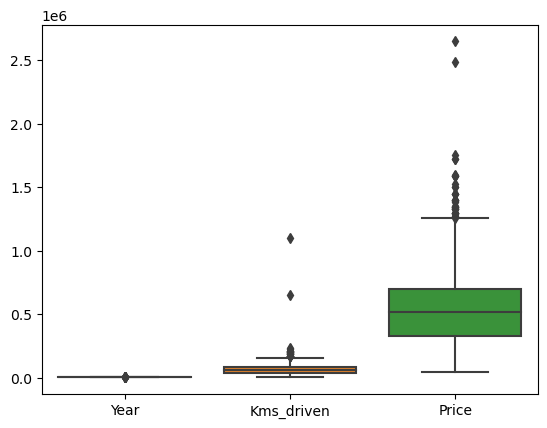

In [14]:
#boxplot to identify the outliers
sns.boxplot(df_copy)
plt.show()

In [15]:
# Calculate the IQR for each column
Q1 = df_copy.quantile(0.25)
Q3 = df_copy.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Impute outliers with lower or upper bound values for each column
for i in df_copy.columns:
    if df_copy[i].dtype != object:
        lower = lower_bound[i]
        upper = upper_bound[i]
        df_copy[i] = np.where(df_copy[i] < lower, lower, df_copy[i])
        df_copy[i] = np.where(df_copy[i] > upper, upper, df_copy[i])

C:\Users\bibek\AppData\Local\Temp\ipykernel_2536\310791612.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_copy.quantile(0.25)
C:\Users\bibek\AppData\Local\Temp\ipykernel_2536\310791612.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_copy.quantile(0.75)


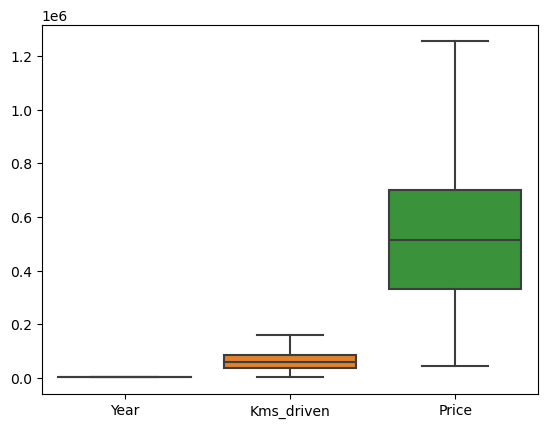

In [16]:
sns.boxplot(df_copy)
plt.show()

In [17]:
df_encoded = pd.get_dummies(df_copy, columns = ["Fuel Type","Suspension"])

In [18]:
df_encoded

,Year,Kms_driven,Price,Fuel Type_CNG,Fuel Type_Diesel,Fuel Type_Petrol,Suspension_Automatic,Suspension_Manual
0,2019.0,19006.000,928999.0,0,0,1,1,0
1,2021.0,11936.000,1255000.0,0,0,1,1,0
2,2018.0,29635.000,994999.0,0,0,1,1,0
3,2020.0,16163.000,1255000.0,0,0,1,1,0
4,2015.0,105114.000,568000.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
993,2008.0,39460.000,80000.0,0,0,1,0,1
994,2007.0,120000.000,85000.0,0,0,1,0,1
995,2007.0,110000.000,60000.0,0,0,1,0,1
996,2008.0,92000.000,95000.0,0,0,1,0,1


In [19]:
#split the data in independent and dependent variable
X = df_encoded.drop("Price", axis = 1)
y = df_encoded[["Price"]]

In [20]:
#split data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)

In [30]:
#scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Linear Regression Model

In [22]:
#import linearregression
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()

In [24]:
#fit linear model
model.fit(X_train_scaled, y_train)

LinearRegression()

In [25]:
#model score
model.score(X_train_scaled, y_train)

0.7246386881833078

In [31]:
model.score(X_test_scaled, y_test)

0.7152872532048516

In [26]:
#y predicted
y_pred = model.predict(X_test_scaled)
y_pred

array([[ 443363.35637021],
       [ 696298.27658087],
       [ 120419.20268652],
       [ 818756.30664322],
       [ 253724.71662442],
       [ 619697.82773645],
       [ 819336.01148401],
       [ 542011.3964335 ],
       [ 461460.39019194],
       [ 508257.27482651],
       [ 440144.55218338],
       [ 959292.10392748],
       [ 373052.8341749 ],
       [ 577932.25046941],
       [ 174901.3974352 ],
       [ 440901.56017808],
       [ 820057.63448699],
       [ 691501.4426987 ],
       [ 190683.62262445],
       [ 514469.27959996],
       [ 808926.31428705],
       [ 642896.33556712],
       [ 243032.10865631],
       [ 193716.66056474],
       [ 504275.23630599],
       [ 533292.38878665],
       [ 524551.19245319],
       [ 379028.91742308],
       [ 966079.4942933 ],
       [ 371397.01944339],
       [1014308.03437311],
       [ 382616.88423583],
       [ 747948.27844054],
       [ 619629.64531505],
       [ 626322.62925123],
       [ 569230.68290689],
       [ 720447.01906275],
 

In [27]:
y_test

,Price
723,275000.0
641,715000.0
766,300000.0
368,965000.0
546,375000.0
...,...
311,600000.0
827,350000.0
134,394000.0
476,280000.0


In [28]:
sq_error= (y_test - y_pred)**2

In [30]:
#mean sum of squred errors
sq_error.mean().sum()

22082395168.474148

In [32]:
#mean  sum of error
(sq_error.mean().sum())**(1/2)

148601.46422049194

# Thank you